LSM EXP 02_Aiffel
<br/>**2. 날씨 좋은 월요일 오후 세시. 자전거 타는 사람은 몇 명?**

<br/>**모듈 import**
<br/>사용 프로그램 colab 자체에 내장된 모듈이라서 따로 설치(pip install)할 필요가 없다.

In [553]:
from sklearn.linear_model import LinearRegression            #선형회귀
from sklearn.model_selection import train_test_split         #훈련 데이터 분리
from sklearn.metrics import mean_squared_error 
import pandas as pd                                          #데이터를 구조화된 형식으로 가공 및 분석할 수 있도록 자료구조를 제공하는 패키지
import numpy as np                                           #Array 수치 행렬 계산
import matplotlib.pyplot as plt                              #데이터 시각화            
import seaborn as sns                                          

#load_diabetes : 당뇨병 환자 데이터와 다중 선형 회귀

##데이터에 관한 정보

[sklearn.datasets.load_diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)


##데이터 가져오기

In [416]:
#데이터셋 불러오기 #변수 할당                          
from sklearn.datasets import load_diabetes              #라이브러리 내 데이터 불러오기
diabetes = load_diabetes()

데이터셋 diabetes에는 data, target, data_filename, data_module, feature_names, frame, target, target_filename까지
<br/>총 8개의 정보가 담겨져있다.

In [ ]:
#DESCR로 Describe 해 보기
print(diabetes['DESCR'])

<br/>비만 환자 442명을 대상으로
나이, 성별, 체질량지수(BMI), 평균 혈압, 혈액 관련 6가지 지표를 측정했다.
<br/>

In [ ]:
#import pandas as pd  
            
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)  #데이터와 특징의 변수가 모인 데이터 프레임 생성                                       #마지막 열에 label 추가
diabetes_df

<br/>총 442개의 데이터가 각각 10개의 정보를 담고 있다.


In [ ]:
diabetes_df[0:1]

0번 index에 위치한 데이터의 정보이다.
<br/>비만 환자 442명의 나이, 체질량지수(BMI), 평균 혈압, 혈액 관련 6가지 지표가
<br/>절댓값 0과 1사이로 소수점 6자리로 담겨있다.

In [ ]:
diabetes_df = diabetes_df.loc[:, ["age", "bmi",	"bp",	"s1",	"s2",	"s3",	"s4",	"s5",	"s6"]]
diabetes_df

산점도 행렬을 출력하기 앞서서 데이터프레임에서 문자열 자료형인 성별은 제외한다.

In [ ]:
#import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해준다
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

from pandas.plotting import scatter_matrix

# scatter_matrix 를 사용한 산점도 행렬 표현
# iris data 를, target 별 다른 색으로 표현
scatter_matrix(diabetes_df,
               c = diabetes['target'],
               alpha=0.5, 
               figsize=(10, 10), 
               diagonal='kde')
plt.show()

<br/>산점도 행렬에서 각 속성의 상관관계를 유추해본다.
<br/>

In [423]:
#import pandas as pd 
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target, columns=['target'])

diabetes의 data를 df_X에, target을 df_y에 할당한다

In [ ]:
df_X

In [ ]:
df_y

##모델 입력 데이터 X 준비

In [426]:
X = df_X.values
y = df_y['target'].values

df_X, df_y에 있는 값들을 numpy array로 변환한다.

In [ ]:
type(df_X.values)

In [ ]:
type(df_y['target'].values)

type 함수를 이용해 numpy array로 변환했는지 확인한다.

<br/>**[생각]**
<br/>type 함수는 코드 진행 여부를 확인할 수 있는 디버깅 역할을 한다.
<br/>어떤 부분에서 변수의 자료형끼리 충돌이 일어났는지 호환성의 문제를 확인할 수 있게 한다.
<br/>print 함수도 디버깅 역할을 하는 대표적인 함수이다.
<br/>
<br/>**[디버깅]**
<br/>np.array 함수를 이용할 때 Gradient 함수에서 dW, db 부분의 충돌이 있어서 실행 오류가 있었다.
<br/>np.array 이전에 .values을 입력하여 이미 numpy array로 변환을 했었기 때문에 <br/>array 변환 과정이 중복되었기 때문에 에러가 발생한 것으로 보인다.

##train 데이터와 test 데이터로 분리

In [ ]:
#from sklearn.model_selection import train_test_split
#테스트 데이터의 사이즈를 20%하고 random_state로 무작위로 분리한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

입력 데이터와 정답 데이터는 준비됐다.
<br/>훈련데이터는 353개, 테스트 데이터는 89개로 분리된다.

##모델 형성

###모델 함수 구현

In [430]:
#import numpy as np

W = np.random.rand(10)
b = np.random.rand()

입력 데이터 개수에 맞는 가중치 W와 b 설정
<br/>길이가 10인 W와 1개의 숫자인 b를 할당한다.

In [ ]:
W1 = W
W1

w에 랜덤한 값으로 w1부터 w10까지 저장한다.

변수 초기화에 사용할 W1를 저장한다.

In [ ]:
b1 = b
b1

b에 랜덤한 값으로 상수가 저장한다.

변수 초기화에 사용할 b1를 저장한다.

In [433]:
def model(X,W,b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i]*W[i]
    predictions += b
    return predictions

가중치에 대한 일차함수를 정의한다.
<br/>y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6 + w7x7 + w8x8 + w9x9 + w10x10 + b
<br/>for문을 이용하여 10개의 가중치 w와 변수 x의 곱을 만들고 끝에 상수 b를 더한다.

In [434]:
def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

손실함수를 MSE 함수로 정의하기 위해서는
먼저 MSE 함수를 정의한다.
<br/>변수 두 값의 차이에 대한 제곱의 평균을 MSE라고 한다.

###손실함수 loss 정의

In [435]:
def loss(X,W,b,y):
    predictions = model(X,W,b)
    Loss = MSE(predictions,y)
    return Loss

가중치에 대한 일차함수와 결합하여
<br/>정답과 예측값 간의 차이에 대한 제곱의 평균 MSE를 정의한다.

In [436]:
def gradient(X,W,b,y):
    N = len(W)
    y_pred = model(X,W,b)
    
    dW = 1/N * 2 * (X.T).dot(y_pred-y)
    db = 2 * (y_pred-y).mean()
    return dW, db

손실함수는 최적을 찾고자 하는 매개변수를 구하기 위한 수식이다.
<br/>정답과 예측값 간의 차이가 최소롤 줄어드는 지점을 알기 위해서는
<br/>손실함수를 미분해야 한다.
<br/>학습을 통한 오차 개선 과정이 기하학적으로 경사하며 감소하는 지점을 나타내는 것이 Gradient 함수이다.

###하이퍼 파라미터 학습률 설정

In [437]:
learning_rate = []
learning_range = np.arange(0.0001, 0.1002, 0.0001)
for learning_rates in learning_range:
  learning_rate.append(round(learning_rates, 4))

In [ ]:
print(learning_rate, end='')

학습률을 0.0부터 0.1까지 0.0001 간격으로 리스트에 1001개의 값을 저장한다.

<br/>**[생각]**
<br/>학습률은 왜 1보다 작은 소수점일까?
<br/>학습률이 많으면 많을수록 최적화된 결과가 나올까?

##모델 학습

### Loss 모델 사용

1000번 학습을 시켜 최적의 손실함수 값을 찾는 기울기 모델이다.
<br/>for문에 의해서 학습횟수(i), learning_rate(j)에 따라
<br/>차례대로 losses 리스트에 loss가 저장된다.
<br/>print문에 의해서 학습횟수(10의 배수), loss(소수점 4자리수), Learning Rate(소수점 2자리수)가 출력된다.

In [440]:
#위에서 np.random.rand()에 의해 설정된 초기화값이다.
print(W1)
print(b1)

[0.2151311  0.0433112  0.48332561 0.22180182 0.51485646 0.86954347
 0.86120543 0.41882902 0.79860289 0.35041312]
0.766229158465267


In [ ]:
#매번 실행될 때마다 똑같은 값이 나와야하기 때문에 초기화값을 설정한다.
losses = []
losses_as_learningrate = []
#위에서 np.random.rand()에 의해 설정된 초기화값이다.
W1 = [0.2151311 , 0.0433112 , 0.48332561, 0.22180182, 0.51485646,
       0.86954347, 0.86120543, 0.41882902, 0.79860289, 0.35041312]
b1 = 0.766229158465267

#학습률 리스트는 [0.0, 0.0001, 0.0002, ..., 0.1]으로 1~1001번째 인덱스를 불러온다.
for n in range(0, 1000):

#1000번을 학습시킨다.
#0번째에는 값을 초기화시키고 1번째부터는 학습을 시작한다.
#1001번째에는 1000번째 학습 결과를 저장하는 단계이다.
  for i in range(0, 1002):

#n번 인덱스에 위치한 학습률을 적용한 학습 결과이다.
#학습률 리스트 [0.0, 0.0001, 0.0002, ..., 0.1]
    for j in range(n, n+1):
      #초기화를 한다.
      if n >= 0 and i == 0:
        W = W1
        b = b1
      #1000번째까지 학습을 한다.
      if n >= 0 and i >= 1:
        dW, db = gradient(X_train, W, b, y_train)
        W -= learning_rate[j] * dW
        b -= learning_rate[j] * db
        L = loss(X_train, W, b, y_train)
        losses.append(L)
        #100의 배수마다 학습 결과 출력하기
        if i % 500  ==  0:
          print('Iteration %d : Loss %0.4f Learning Rate %0.4f' % (i, L, learning_rate[j]))
        #1001번째 : 1000번째(마지막) 학습 결과 저장  
        elif i == 1001:
          losses_as_learningrate.append(losses[-2])
       

In [ ]:
losses_as_learningrate

0.0부터 0.1까지 0.0001 간격으로 있는 학습률에 대한 손실함수값을 저장한다.

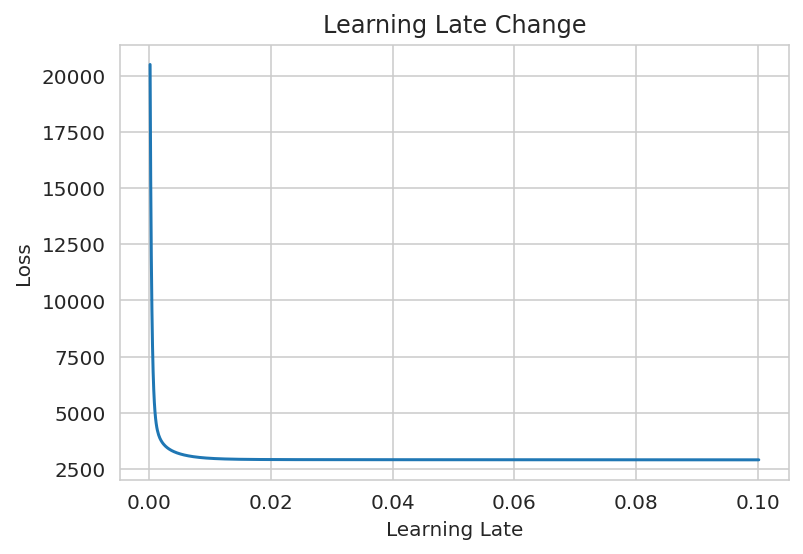

In [475]:
#from matplotlib import pyplot as plt

x_values = learning_rate[1:1001]	    #x축 지점의 값들
y_values = losses_as_learningrate[:]	#y축 지점의 값들
plt.plot(x_values, y_values)	        #line 그래프 그리기
plt.title('Learning Late Change')     #제목
plt.xlabel("Learning Late")           #x축
plt.ylabel("Loss")                    #y축
plt.show()

Learning Rate가 (0.0, 0.1)구간에서 가장 큰 0.1일 때 
Loss값이 작다.

### test 데이터에 대한 성능 확인하기

In [ ]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print('Loss %0.2f' % (mse))

train 데이터와 test 데이터의 loss값은 2840.39이다.

### 정답 데이터와 예측한 데이터 시각화하기

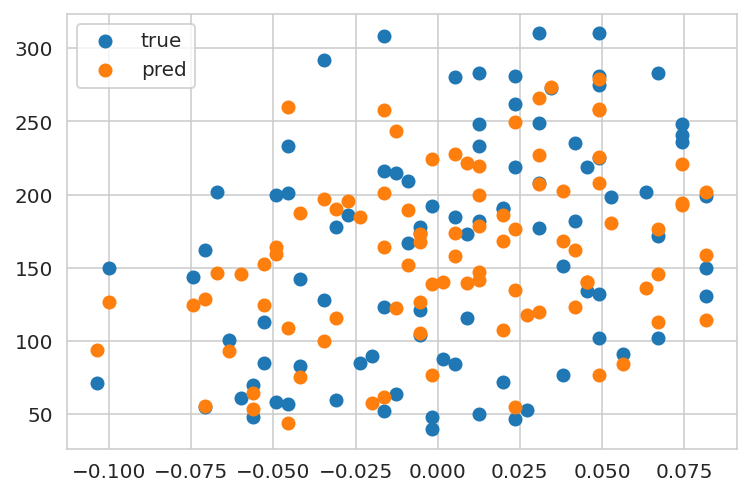

In [477]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()

산점도는 데이터의 분포를 보여준다.
<br/>정답 데이터와 예측 데이터 분포 사이의 유사도를 파악한다.

#load_train.csv : Forecast use of a city bikeshare system

##데이터에 관한 정보

[Kaggle Data : Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand/data)

##데이터 가져오기

In [ ]:
#구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive') #Google Drive File Upload

In [ ]:
#데이터셋 불러오기 #변수 할당  
bike = pd.read_csv('/content/drive/MyDrive/LMS/train.csv')
bike.head()

[Bike](https://www.kaggle.com/c/bike-sharing-demand/data)
<br/>Kaggle 사이트에 나와있는 데이터 정보


자전거 키오스크 대여 서비스에 기록된 도시 위치 정보를 2년 동안 수집했다.
<br/>날씨 데이터와 함께 자전거의 사용 경로 정보가 결합되어 있다.


train 데이터는 매달 1일부터 19일까지
<br/>test 데이터는 매달 20일부터 마지막날까지 정보가 결합되어 있다.

In [ ]:
bike[76:77]

|제목|내용|
|-------|--------|
|datetime|1시간 주기|
|season|(1, 2, 3, 4) = (spring, summer, fall, winter) |
|holiday|휴일이면 1|
|workingday|휴일, 주말이 아니면 1|
|season|(1) Clear, Few clouds, Partly cloudy, Partly cloudy |
|holiday|(2) Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist|
|temp|섭씨 온도|
|atemp|체감 온도|
|humidity|상대 습도|
|windspeed|바람 속도|
|casual|미등록 사용자(비회원) 대여 횟수|
|registered|등록 사용자(회원) 대여 횟수| 
|count|(총 대여 횟수(비회원 + 회원)|

In [ ]:
#데이터의 크기 확인
print(bike.shape) 

총 10886개의 데이터가 각각 12개의 정보를 담고 있다.

In [ ]:
#변수와 메서드 확인
dir(bike)[:3]

In [ ]:
len(dir(bike))

데이터셋 bike에는 T, _AXIS_LEN, _AXIS_ORDERS까지
<br/>총 443개의 정보가 담겨져있다.
<br/>슬라이싱(Slicing)을 이용해 간략하게 3개의 정보만 확인해본다.

## datetime

### datetime을 각 시간 단위로 나누기

In [ ]:
#to_datetime 활용 : 링크 참조
bike_datetime = pd.to_datetime(bike['datetime'])
bike_datetime

datetime 컬럼을 datetime 자료형으로 변환

In [ ]:
bike_datetime.dt.year

데이터이름.dt.시간단위 메서드를 이용하여
<br/>year, month, day, hour, minute, second 키워드를 검색할 수 있다.

In [ ]:
bike['year'] = bike_datetime.dt.year
bike['month'] = bike_datetime.dt.month
bike['day'] = bike_datetime.dt.day
bike['hour'] = bike_datetime.dt.hour
bike['minute'] = bike_datetime.dt.minute
bike['second'] = bike_datetime.dt.second
bike

데이터프레임에 연, 월, 일, 시, 분, 초까지 6가지 컬럼 추가하기

### datetime 데이터 개수 시각화하기

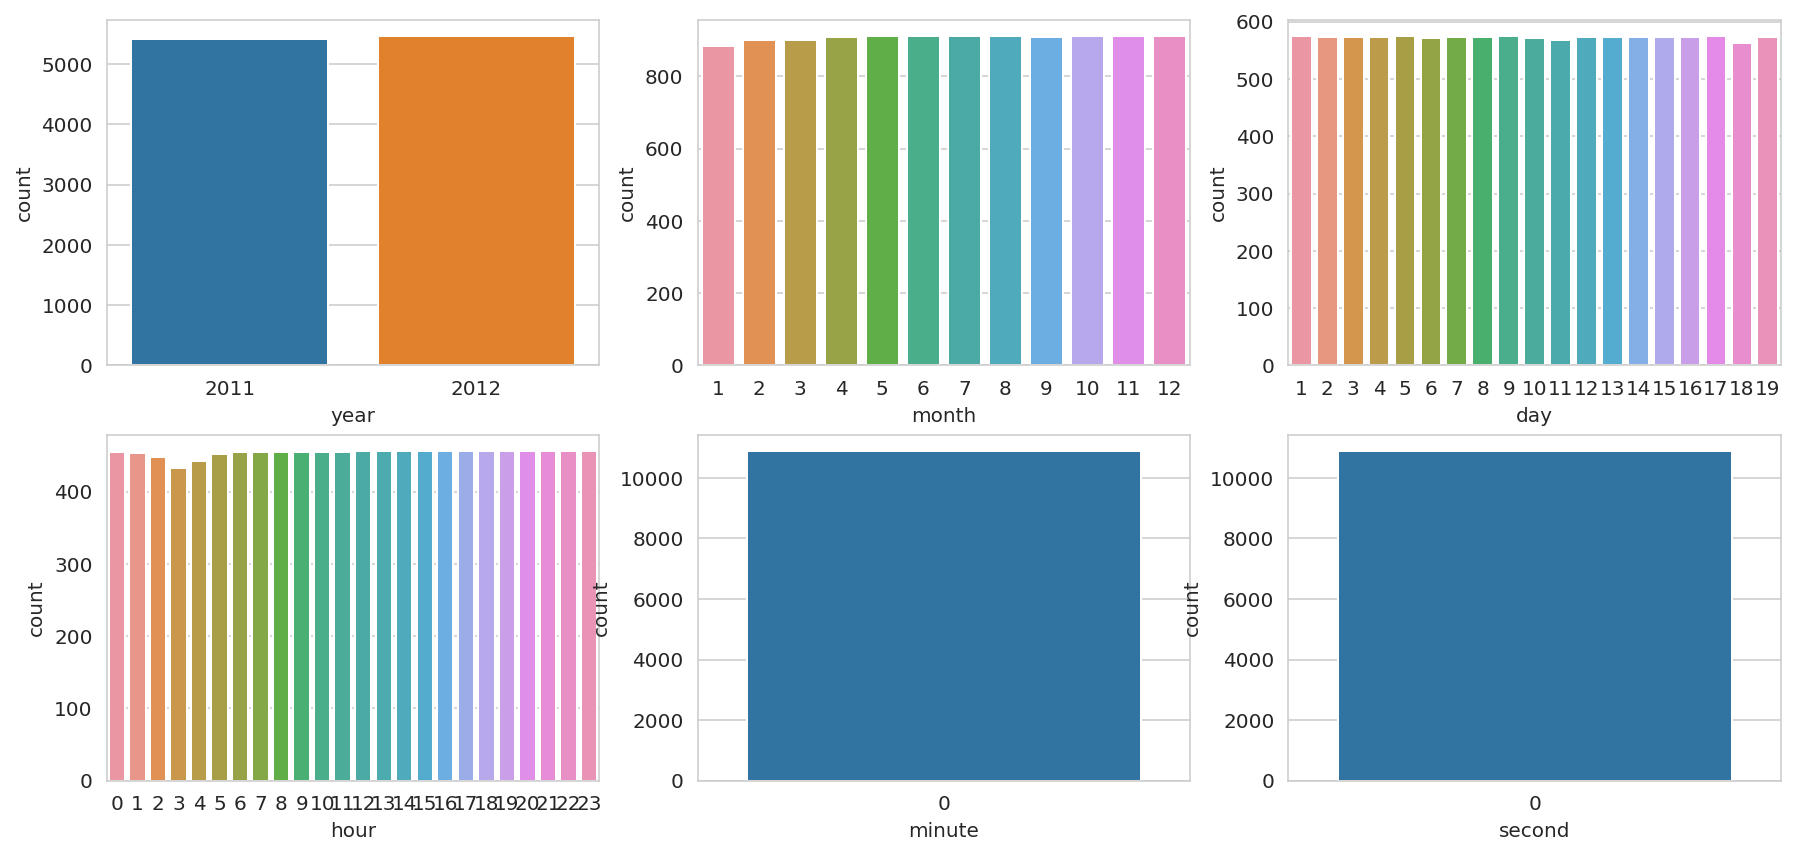

In [601]:
#import seaborn as sns

# 차트 배경 설정
sns.set_style('whitegrid')

#subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
sns.countplot(bike['year'])

plt.subplot(2,3,2)
sns.countplot(bike['month'])

plt.subplot(2,3,3)
sns.countplot(bike['day'])

plt.subplot(2,3,4)
sns.countplot(bike['hour'])

plt.subplot(2,3,5)
sns.countplot(bike['minute'])

plt.subplot(2,3,6)
sns.countplot(bike['second'])

plt.show()

year, month, day, hour은 일정한 간격으로 구성되어 있다.
<br/>minute, second는 숫자 0으로만 존재한다.

## train/test 데이터 분리

In [ ]:
bike.isnull().sum()

결측치는 없다.

In [ ]:
X = bike.drop(['datetime'], axis = 1)
X = X.drop(['minute'], axis = 1)
X = X.drop(['second'], axis = 1)
X = X.drop(['casual'], axis = 1)
X = X.drop(['registered'], axis = 1)
X = X.drop(['count'], axis = 1)
X

X에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터를 저장한다.

In [604]:
y = bike[['count']].values

count 값을 맞추기 위해, y 변수에 count 컬럼의 데이터를 저장한다.

In [648]:
#from sklearn.model_selection import train_test_split     
X_train, X_test, y_train, y_test = train_test_split(X,  y,           #예측 데이터와 정답 데이터
                                                    test_size=0.2,   #전체의 20%를 테스트 데이터로 사용
                                                    random_state=1)  #데이터를 무작위로 정렬하여 분리

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  8708 , X_test 개수:  2178


훈련데이터 8708개. 테스트용 데이터 2178개로 나누었다.

## 모델 학습

### LinearRegression 모델

In [649]:
#from sklearn.linear_model import LinearRegression   

linear_regression = LinearRegression()

In [650]:
linear_regression.fit(X_train, y_train)

LinearRegression()

### X_test에 대한 예측값 출력

In [ ]:
y_pred = linear_regression.predict(X_test)                        

y_pred 

학습된 모델에 X_test를 입력해서 예측값 출력하기

In [ ]:
y_test

### 손실함수값 계산

In [ ]:
#from sklearn.metrics import mean_squared_error 

MSE = mean_squared_error(y_test, y_pred)
MSE

오차(Error)를 제곱(Square)해서 평균(Mean)한 값으로 21092.84이다.

In [ ]:
RMSE = MSE**0.5
RMSE

오차(Error)를 제곱(Square)해서 평균(Mean)한 값의 제곱근(Root)으로 145.23이다.

### 시각화 (temp or humidity, count)

In [656]:
X_test_df = X_test
X_test_df['y_pred'] = y_pred
X_test_df['y_test'] = y_test

In [ ]:
X_test_df

커널 밀도 추정(kernel density estimation; KDE) 메서드를 사용한다.
<br/> KDE는 커널들을 조립하여 확률밀도함수(probability density function)의 모양을 찾는 비모수 추정 방법이다.
<br/> 커널이란 분포를 나타내는 기본 단위를 말한다.

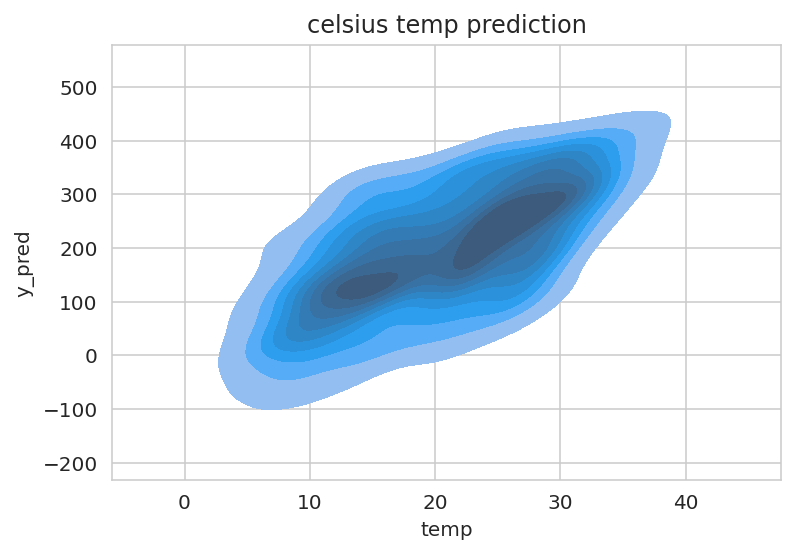

<Figure size 720x576 with 0 Axes>

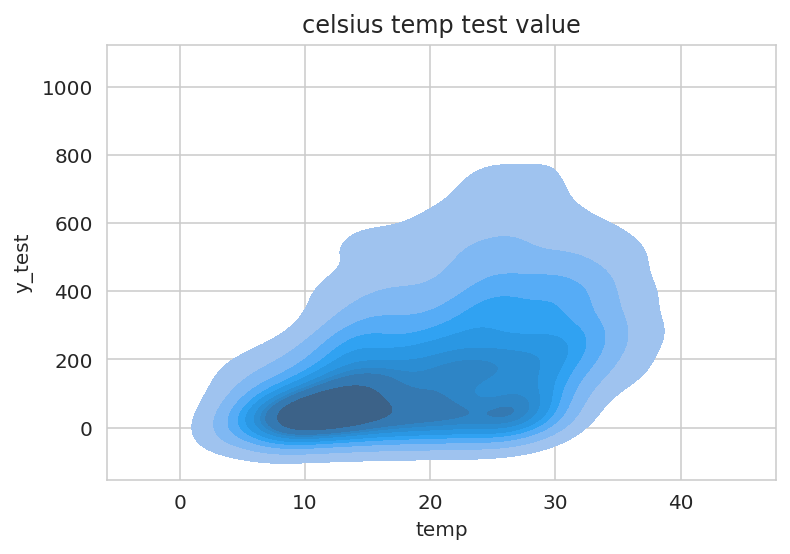

<Figure size 720x576 with 0 Axes>

In [658]:
#from matplotlib import pyplot as plt
#import seaborn as sns

#이차원 밀집도 그리기


ax1 = plt.subplots()
ax1 = sns.kdeplot(data=X_test_df["temp"],
                  data2=X_test_df["y_pred"],
                  shade=True) #shade=True 음영효과 설정
ax1.set_title('celsius temp prediction')
ax1.set_xlabel('temp')
ax1.set_ylabel('y_pred')
plt.figure(figsize = (10,8))


ax2 = plt.subplots()
ax2 = sns.kdeplot(data=X_test_df["temp"],
                  data2=X_test_df["y_test"],
                  shade=True) #shade=True 음영효과 설정
ax2.set_title('celsius temp test value')
ax2.set_xlabel('temp')
ax2.set_ylabel('y_test')
plt.figure(figsize = (10,8))
plt.tight_layout()
plt.show()


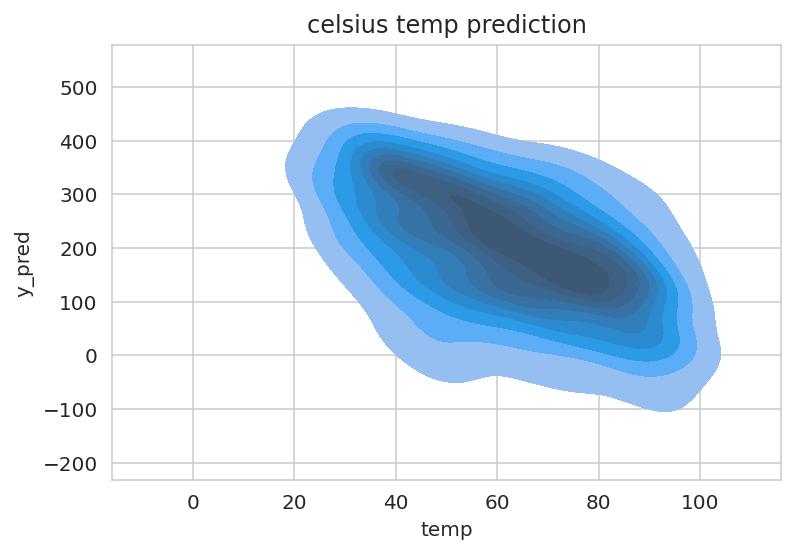

<Figure size 720x576 with 0 Axes>

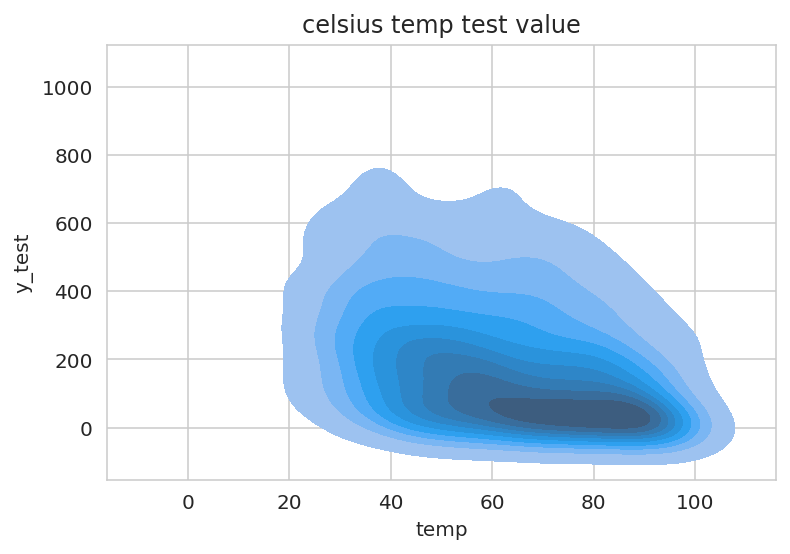

<Figure size 720x576 with 0 Axes>

In [664]:
#from matplotlib import pyplot as plt
#import seaborn as sns

#이차원 밀집도 그리기


ax3 = plt.subplots()
ax3 = sns.kdeplot(data=X_test_df["humidity"],
                  data2=X_test_df["y_pred"],
                  shade=True) #shade=True 음영효과 설정
ax3.set_title('celsius temp prediction')
ax3.set_xlabel('temp')
ax3.set_ylabel('y_pred')
plt.figure(figsize = (10,8))


ax4 = plt.subplots()
ax4 = sns.kdeplot(data=X_test_df["humidity"],
                  data2=X_test_df["y_test"],
                  shade=True) #shade=True 음영효과 설정
ax4.set_title('celsius temp test value')
ax4.set_xlabel('temp')
ax4.set_ylabel('y_test')
plt.figure(figsize = (10,8))

plt.tight_layout()
plt.show()

#결론

load_diabetes에서 loss값을 계산하기 앞서 파라미터를 설정하며 함수 모델을 만든다.
<br/>Predcitions. MSE. Gradient. Loss 등 여러 함수 모델이 결합하며 파라미터들이 관계를 짓는다.
<br/>여기서 프로그래머의 역할은 각 파라미터들이 어떻게 작동하는지 알고 있어야 하는 것이다.
<br/>기계의 부품이 어떻게 작동하는지 알고 있어야 좋은 성능을 낼 수 있기 때문이다.



이와 관련해 직접 파라미터를 설정했던 경험으로 학습률(learning rate)을 설정하는 알고리즘을 만든 것이다.
<br/>학습률이 0.001부터 0.1까지 차례대로 증가하며 이에 상응하는 손실함수값을 계산하는 알고리즘이다.
<br/>아쉬움이 남는 것은 가중치(W), 상수(b)를 자동으로 초기화하는 부분을 만들지 못한 것이다.
<br/>다른 부분은 자동으로 실행되지만
<br/>가중치와 상수 부분은 수동적으로 초기화값을 입력해주어야한다.
<br/>입력해주지 않으면 for문에서 가중치와 상수 부분이 변해서 값을 고정시킬 수 없다.